<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/Projetos/Modulo%201/Projeto_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 - BootCamp Data Science Aplicada 3

Neste notebook, faremos comparações entre valores da Produção Hospitalar Brasileira, separada entre escopos Público e Não Público, para cada estado. Os dados foram retirados do DataSUS, no tabnet. 

Para a separação entre os escopos citados, foi utilizado o filtro de Naturezas Jurídicas, no próprio tabnet. No escopo Público, foram selecionados todas as entidades de admnistração pública. Já no Não Público, foram selecionadas as entidades empresariais, sem fim lucrativo, pessoas físicas e instituições extraterritoriais.

Foi utilizado o filtro por ano/mes atendimento. Por isso, não inclui os dados de 2021, posto que, como ainda há atendimentos que não foram processados, eles não são tão confiáveis.



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#Arrumando como os valores são mostrados
pd.options.display.float_format = "{:.2f}".format

#Setando o estilo dos gráficos pra ggplot
plt.style.use('ggplot')

In [108]:
#importando Internações Não Públicas
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/Internacoes_NaoPub.csv'
internacoes_nao_pub = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

internacoes_nao_pub = internacoes_nao_pub.drop("Total", axis=1) #tirando a coluna total
internacoes_nao_pub = internacoes_nao_pub.set_index("Unidade da Federação") #setando o índice
internacoes_nao_pub = internacoes_nao_pub.replace('-', np.nan) #substituindo dado inexistente por nan
internacoes_nao_pub = internacoes_nao_pub.astype('float64') #mudando tudo para float64


internacoes_nao_pub.head()

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,1.00,nan,nan,nan,nan,nan,7.00,42.00,105.00,393.00,1828.00,5242.00,5562.00,5105.00,5175.00,5148.00,6099.00,7080.00,7332.00,6875.00,6907.00,6699.00,5864.00,7062.00,6923.00,9130.00,8415.00,8403.00,7383.00,7884.00,8161.00,8019.00,8521.00,8352.00,8359.00,8670.00,7945.00,9036.00,8551.00,...,661.00,690.00,723.00,639.00,698.00,840.00,798.00,818.00,898.00,960.00,910.00,1182.00,1110.00,1190.00,1120.00,1005.00,1111.00,1116.00,1123.00,1095.00,1025.00,1004.00,757.00,899.00,1155.00,1276.00,1293.00,1173.00,1194.00,1090.00,1050.00,1074.00,942.00,1148.00,1171.00,1328.00,1207.00,1242.00,921.00,346.00
12 Acre,1.00,nan,nan,nan,nan,1.00,nan,5.00,17.00,100.00,573.00,1490.00,3735.00,3723.00,4163.00,4223.00,4471.00,4478.00,4083.00,3823.00,4182.00,4141.00,3928.00,4060.00,4053.00,3782.00,4519.00,4274.00,4597.00,3933.00,3787.00,3027.00,1971.00,4232.00,4158.00,4026.00,4034.00,3624.00,4556.00,4508.00,...,493.00,463.00,527.00,458.00,505.00,445.00,413.00,503.00,354.00,425.00,503.00,568.00,554.00,581.00,576.00,556.00,542.00,526.00,476.00,469.00,460.00,444.00,328.00,370.00,367.00,388.00,415.00,538.00,533.00,514.00,505.00,505.00,431.00,408.00,395.00,567.00,562.00,496.00,263.00,nan
13 Amazonas,3.00,2.00,nan,1.00,nan,nan,1.00,59.00,69.00,565.00,2780.00,9979.00,13628.00,13828.00,14869.00,14323.00,14904.00,14578.00,14936.00,14413.00,13346.00,12602.00,12137.00,12050.00,12585.00,12170.00,13891.00,12228.00,12526.00,13409.00,13492.00,13728.00,13201.00,12614.00,12707.00,12549.00,13542.00,12401.00,14616.00,13674.00,...,402.00,496.00,569.00,499.00,552.00,516.00,530.00,560.00,524.00,526.00,465.00,486.00,477.00,429.00,467.00,482.00,525.00,461.00,414.00,456.00,510.00,455.00,304.00,322.00,343.00,387.00,450.00,393.00,422.00,388.00,402.00,430.00,364.00,413.00,483.00,453.00,476.00,489.00,449.00,40.00
14 Roraima,nan,nan,nan,nan,nan,1.00,nan,14.00,8.00,73.00,818.00,1121.00,1898.00,1739.00,2047.00,2211.00,2415.00,2295.00,2228.00,2298.00,2116.00,2205.00,2122.00,1986.00,2224.00,2142.00,2525.00,2256.00,2372.00,2371.00,2646.00,2610.00,2558.00,2473.00,2447.00,2236.00,2568.00,2277.00,2828.00,2590.00,...,137.00,134.00,121.00,109.00,139.00,120.00,93.00,146.00,146.00,138.00,141.00,133.00,132.00,138.00,24.00,72.00,140.00,183.00,159.00,196.00,115.00,50.00,90.00,103.00,75.00,104.00,194.00,147.00,100.00,11.00,52.00,138.00,138.00,197.00,185.00,149.00,146.00,114.00,92.00,nan
15 Pará,8.00,6.00,nan,nan,1.00,1.00,4.00,404.00,798.00,3202.00,8690.00,24743.00,43817.00,40225.00,43274.00,44734.00,44894.00,43375.00,42102.00,42623.00,43120.00,41511.00,39500.00,38044.00,42604.00,39241.00,46754.00,45663.00,44842.00,43580.00,44144.00,45996.00,45576.00,44457.00,44155.00,41346.00,43745.00,42286.00,48037.00,44248.00,...,14477.00,14252.00,15522.00,14569.00,15780.00,14067.00,13560.00,15297.00,13858.00,15013.00,15277.00,15901.00,14437.00,14203.00,14362.00,14696.00,15172.00,14911.00,14393.00,15008.00,13947.00,13708.00,9592.00,10262.00,11249.00,12699.00,13105.00,13072.00,13898.00,13292.00,13284.00,12251.00,11459.00,11932.00,11266.00,11840.00,11923.00,11274.00,8199.00,2258.00


In [109]:
#Importando Internações Públicas

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/Internacoes_Pulicas.csv'
internacoes_publicas = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=5, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

internacoes_publicas = internacoes_publicas.drop("Total", axis=1) #tirando a coluna total
internacoes_publicas = internacoes_publicas.set_index("Unidade da Federação") #setando o índice
internacoes_publicas = internacoes_publicas.replace('-', np.nan) #substituindo dado inexistente por nan
internacoes_publicas = internacoes_publicas.astype('float64') #mudando tudo para float64

internacoes_publicas.head()

,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,10.00,12.00,119.00,470.00,2311.00,6946.00,7250.00,7427.00,7034.00,7456.00,7217.00,7064.00,7843.00,7818.00,9020.00,8994.00,8493.00,8102.00,8599.00,8867.00,8574.00,9236.00,9156.00,8779.00,9174.00,8433.00,9317.00,9410.00,9963.00,9291.00,9314.00,9610.00,...,9390.00,9378.00,9616.00,9182.00,9659.00,9246.00,8763.00,8630.00,8682.00,9612.00,9875.00,10108.00,8885.00,8750.00,8822.00,9142.00,9256.00,9249.00,8738.00,8743.00,8481.00,7706.00,6402.00,6544.00,6642.00,7284.00,7780.00,7423.00,7810.00,8049.00,7751.00,7858.00,7734.00,9005.00,8880.00,8915.00,8013.00,6888.00,5271.00,1480.00
12 Acre,nan,nan,nan,nan,1.00,nan,nan,1.00,12.00,60.00,533.00,1263.00,1901.00,3424.00,3781.00,3479.00,3515.00,3541.00,3359.00,3006.00,3460.00,2800.00,3509.00,3366.00,3189.00,3050.00,3336.00,3257.00,3236.00,3630.00,3330.00,3104.00,3185.00,3087.00,3324.00,3533.00,3530.00,3438.00,3444.00,3589.00,...,3351.00,3500.00,3527.00,3326.00,3454.00,2672.00,2611.00,3006.00,2808.00,2834.00,3086.00,3497.00,3432.00,3451.00,3296.00,3415.00,3570.00,3124.00,3120.00,3371.00,3332.00,3204.00,2501.00,2448.00,2662.00,3161.00,3159.00,3187.00,3440.00,3330.00,3356.00,3542.00,3415.00,3622.00,3535.00,3594.00,3291.00,2895.00,1834.00,nan
13 Amazonas,nan,nan,nan,nan,nan,nan,nan,1.00,16.00,34.00,420.00,3046.00,10321.00,13337.00,13632.00,13560.00,12393.00,13367.00,12715.00,11723.00,14385.00,11859.00,13276.00,13269.00,13801.00,13432.00,13140.00,12833.00,12559.00,12866.00,12565.00,11552.00,11897.00,10604.00,11718.00,11950.00,12081.00,11616.00,12111.00,12216.00,...,14974.00,15780.00,15560.00,14889.00,15546.00,14667.00,14196.00,15496.00,14376.00,16439.00,15898.00,16177.00,15566.00,16399.00,16723.00,15854.00,16467.00,15587.00,14823.00,15799.00,14677.00,14604.00,11890.00,12862.00,13464.00,14812.00,15022.00,15049.00,15096.00,14811.00,15780.00,17389.00,15124.00,17031.00,16128.00,17151.00,16765.00,16710.00,13307.00,6934.00
14 Roraima,nan,nan,nan,nan,nan,nan,nan,1.00,3.00,113.00,1306.00,1456.00,2198.00,2356.00,2529.00,2663.00,2395.00,1970.00,2519.00,2289.00,2597.00,2314.00,2779.00,2710.00,2879.00,3103.00,2902.00,2867.00,2827.00,2830.00,2650.00,2569.00,2724.00,2298.00,2750.00,2630.00,2884.00,2489.00,2836.00,2657.00,...,3676.00,3805.00,3927.00,3705.00,3640.00,3138.00,3193.00,3370.00,3183.00,3325.00,3495.00,3499.00,3375.00,3784.00,4060.00,3884.00,4059.00,3742.00,3392.00,3535.00,3478.00,3402.00,2494.00,2781.00,2899.00,2976.00,3138.00,3155.00,3304.00,3239.00,3319.00,3403.00,3277.00,3415.00,3222.00,3467.00,3430.00,3466.00,3147.00,2072.00
15 Pará,nan,nan,nan,nan,nan,nan,nan,18.00,123.00,556.00,2736.00,5793.00,12701.00,20435.00,20123.00,19925.00,21424.00,20881.00,19916.00,18715.00,22690.00,21476.00,24602.00,24728.00,24450.00,22952.00,22781.00,23147.00,23023.00,23247.00,22088.00,21357.00,23168.00,22064.00,24618.00,23647.00,24608.00,23309.00,23740.00,24706.00,...,26572.00,26231.00,27128.00,26464.00,27826.00,25381.00,24677.00,25968.00,24204.00,26225.00,24805.00,24915.00,22518.00,26493.00,26275.00,26358.00,27230.00,25546.00,24616.00,26436.00,24673.00,24140.00,19409.00,21268.00,21166.00,23358.00,24066.00,23673.00,24647.00,24017.00,23043.00,24982.00,23699.00,29847.00,

In [110]:
#Importando Valor Total Gasto Não Público

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/ValorTotal_NaoPub.csv'
valor_nao_pub = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

valor_nao_pub = valor_nao_pub.drop("Total", axis=1) #tirando a coluna total
valor_nao_pub = valor_nao_pub.set_index("Unidade da Federação") #setando o índice
valor_nao_pub = valor_nao_pub.replace('-', np.nan) #substituindo dado inexistente por nan
valor_nao_pub = valor_nao_pub.astype('float64') #mudando tudo para float64

valor_nao_pub.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,999428.50,1188529.96,1102013.95,1056691.19,1082809.13,1411126.56,1436967.98,1456806.87,1441427.99,1690912.10,1592121.56,1762233.50,1675529.42,1734489.99,1726585.78,1490645.06,1705793.77,1926900.46,1853430.41,1831317.60,1729688.78,1723717.89,1624020.19,1739141.78,2914490.03,2642036.96,3317401.89,2303324.92,1915862.70,2139319.31,2041299.57,1748169.91,1681305.51,4027889.68,4458298.94,5546215.22,4320040.46,3347125.01,2417903.98,659412.17
12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,659498.57,597464.50,586525.33,521122.07,624557.43,473625.97,390271.80,576625.28,388795.03,530767.43,641144.34,585655.36,613756.10,673101.90,653643.53,532627.38,575189.42,585635.89,546212.43,481442.96,488677.14,548864.33,383230.60,487719.45,431813.31,540279.40,472734.10,631095.71,529313.09,535456.14,559718.75,610372.47,472686.03,453596.12,452084.62,615672.23,555289.77,446457.21,224526.05,nan
13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,295477.37,331455.29,364435.39,323402.27,350114.33,348646.21,351193.80,353661.96,330875.73,337477.71,306272.68,325328.10,306862.86,256731.22,307449.80,246959.25,349370.91,347635.37,543291.53,738090.38,709570.65,623089.13,495196.27,468398.28,549970.19,702141.10,670614.82,674050.03,743658.72,608648.88,499415.23,773244.40,1812092.37,1366566.61,1111463.48,871310.44,809553.05,1056925.56,771755.44,254636.27
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,74146.64,74934.34,73935.74,59993.43,77602.47,68257.12,50122.78,79498.26,78483.71,74386.68,73916.69,67337.63,72156.18,67446.54,11455.86,42019.59,66421.27,92079.20,86111.47,97078.23,53550.75,38630.29,46407.75,42513.17,27468.58,43479.42,81861.73,56345.69,34476.99,4219.55,20472.59,69050.50,65272.35,98436.77,90295.13,74815.84,66239.27,53967.79,42918.62,nan
15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,11946167.35,12428740.99,13055668.47,12327489.52,14002340.02,12054377.73,11429725.83,12585724.36,11515869.43,12249566.69,13096568.56,13587540.66,12856665.32,13073205.64,13024577.99,13103361.04,13018000.50,12840718.61,12323280.91,13250902.49,12198077.44,12914215.33,9335166.72,12920759.58,13686621.99,14654012.39,14057145.27,14276303.10,14695144.01,14261833.53,14743190.66,13688457.18,12660245.24,13870107.48,15587032.84,16019748.04,15656695.51,14024947.41,10298568.61,2763431.28


In [111]:
#Importando Valor Total Gasto Público

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/ValorTotal_Publico.csv'
valor_publico = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

valor_publico = valor_publico.drop("Total", axis=1) #tirando a coluna total
valor_publico = valor_publico.set_index("Unidade da Federação") #setando o índice
valor_publico = valor_publico.replace('-', np.nan) #substituindo dado inexistente por nan
valor_publico = valor_publico.astype('float64') #mudando tudo para float64

valor_publico.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,7206767.42,7823082.62,8022953.89,7350041.53,7328550.89,7239955.10,6756458.01,6931462.58,7203887.79,7359417.03,7619140.95,7728311.52,6925356.78,7184700.87,7182526.11,6918741.03,7218554.64,7021705.20,6807322.64,6497063.83,6701645.84,5527569.31,5867933.20,7222980.01,8155334.94,7966622.38,8261237.61,6713973.80,6364437.25,6770220.43,7427979.86,8297454.48,8995939.67,14119231.34,13295552.51,12113640.57,10115863.01,8487310.09,4953430.86,1023389.43
12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2401404.64,2655547.11,2454119.72,2405057.20,2501563.21,1999828.88,1887221.69,2017722.04,1845593.33,1942241.06,2338620.43,2484878.59,2635296.59,2894436.74,2327429.45,2466232.93,2718189.55,2588613.54,2413356.66,2795347.59,2497086.57,2390810.87,2289626.73,2453108.41,3483010.55,3512806.01,3185531.49,2839552.93,2738605.60,2961892.34,3261147.08,3565153.59,4809969.39,5246001.66,4550187.97,3711210.01,2902897.34,1856253.80,972228.80,nan
13 Amazonas,903320.98,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14358173.40,15213140.50,16010526.02,15019938.66,15899849.28,13906762.61,13922860.14,15005252.04,13769198.83,15766494.18,15848219.14,16204647.96,15203121.97,16385489.49,16186269.72,15104648.22,15990057.04,14474342.13,14422524.37,15244263.04,14456900.17,14194462.47,15888890.34,19161286.82,17888122.69,18603393.84,18027757.30,17965066.62,18006673.47,19978763.50,21411795.71,26633214.17,20528950.26,26557220.33,23404456.61,23102227.27,21365845.35,20558017.99,13035203.22,5037687.09
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2893014.71,2766653.63,3254294.89,2818697.61,2886721.85,2456455.28,2412328.86,2582741.92,2421512.45,2771748.88,2715906.60,2772051.90,2575384.02,2798331.17,3169865.96,3028417.37,3095921.17,3029025.51,2803858.40,2987482.85,2913608.29,2775323.76,2259712.20,2879008.99,3272544.40,3148595.99,3180492.61,2922283.53,3278819.79,3527654.89,3173236.30,3488771.49,4107013.47,5328789.93,4102245.41,3606601.96,3408966.28,3266840.17,2864952.45,1496814.75
15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,22214115.83,22056208.50,22562695.57,22053427.38,24438750.48,21529160.35,21359629.04,21927810.44,20370050.24,20986589.10,17912356.39,17476565.84,15686513.98,23640723.72,23437433.48,23689592.98,23966314.10,22738532.88,22924378.39,23795448.27,22485263.73,21994205.17,19849521.58,30416190.81,27359772.85,25879674.96,24807106.87,22727054.05,23812335.69,22966402.96,23182321.62,25353892.28,24453195.46,35755308.65,36971294.45,34887478.73,28219894.96,19693136.71,10539297.28,1856831.75


Como algumas das bases têm colunas com dados faltantes antes de 2015, utilizarei somente os dados a partir de 2017.

Como estou usando a data de procedimento, não usarei dados de 2021, pois podem haver casos que ainda não foram processados.

Por questões de simplicidade, irei comparar os valores entre os estados do sudeste.

In [112]:
#Usarei somente os dados de 2015 a 2020
meses_utilizados = ['2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai',
       '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out',
       '2015/Nov', '2015/Dez', '2016/Jan', '2016/Fev', '2016/Mar',
       '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago',
       '2016/Set', '2016/Out', '2016/Nov', '2016/Dez', '2017/Jan',
       '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun',
       '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov',
       '2017/Dez', '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr',
       '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set',
       '2018/Out', '2018/Nov', '2018/Dez', '2019/Jan', '2019/Fev',
       '2019/Mar', '2019/Abr', '2019/Mai', '2019/Jun', '2019/Jul',
       '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez',
       '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai',
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out',
       '2020/Nov', '2020/Dez']

#Separando somente os meses desejados e ordenando-os em ordem decrescente
internacoes_publicas = internacoes_publicas[meses_utilizados].sort_values(meses_utilizados, ascending=False)
internacoes_nao_pub = internacoes_nao_pub[meses_utilizados].sort_values(meses_utilizados, ascending=False)
valor_publico = valor_publico[meses_utilizados].sort_values(meses_utilizados, ascending=False)
valor_nao_pub = valor_nao_pub[meses_utilizados].sort_values(meses_utilizados, ascending=False)

#O que farei na análise?
Com os bancos de dados adicionados e tratados, podemos começar a analisá-los. Criarei gráficos comparando o número de internações Públicas e Não Públicas de alguns estados.

#Qual a minha hipótese?
Acredito que estados com maior renda per capita terão maior número de internações Não Públicas, enquanto estados de menor renda per capita, terão maior número de internações Públicas. 

Acredito nisto porque, com maior renda, os habitantes dos estados em questão têm maior poder financeiro, possibilitando-os de procurar alternaticas ao tratamento público.

In [102]:
#Importação da tabela de renda per capita por estado, de 2019
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/Rende_per_capita.csv'
renda_per_capita = pd.read_csv(URL, encoding='utf-8', sep=';')
renda_per_capita

,Unidade da Federação,Renda per Capita
0,Distrito Federal,2.685
1,São Paulo,1.945
2,Rio de Janeiro,1.881
3,Rio Grande do Sul,1.842
4,Santa Catarina,1.769
5,Paraná,1.620
6,Mato Grosso do Sul,1.514
7,Espírito Santo,1.476
8,Mato Grosso,1.402
9,Minas Gerais,1.357


#Comparação entre o número de internações Públicas e Não Públicas no Estado de São Paulo
É interessante notar que o número de internações Públicas e Não Públicas, no estado de São Paulo, tende a ser similar, especialmente a partir de 2019.

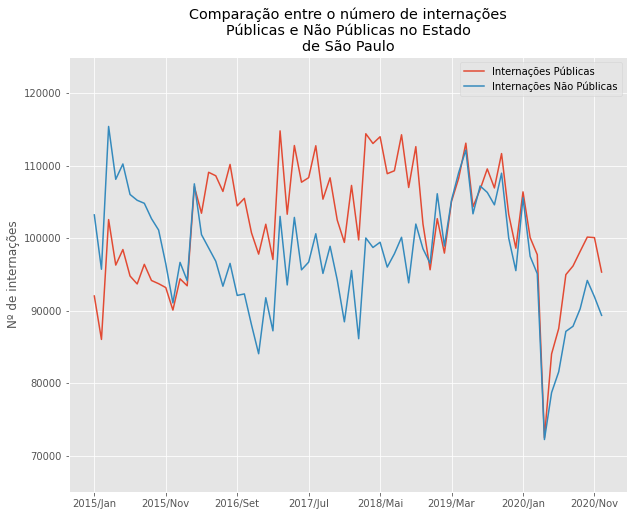

In [135]:
ax = internacoes_publicas.loc["35 São Paulo"].T.plot(figsize=(10,8), ylabel="Nº de internações")
internacoes_nao_pub.loc["35 São Paulo"].T.plot(ax=ax)
plt.ylim(65000,125000)
ax.legend(["Internações Públicas", "Internações Não Públicas"])
plt.title('Comparação entre o número de internações\nPúblicas e Não Públicas no Estado\nde São Paulo')
plt.show()

#Comparação entre o número de internações Públicas e Não Públicas no Estado de Minas Gerais
Já no estado de Minas Gerais, é possível notar que o número de internações Não Públicas é consideravelmente maior que o número de internações Públicas.

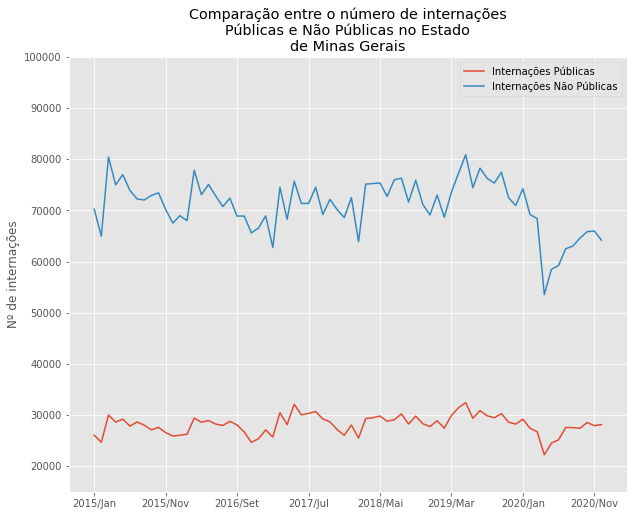

In [82]:
ax = internacoes_publicas.loc["31 Minas Gerais"].T.plot(figsize=(10,8), ylabel="Nº de internações")
internacoes_nao_pub.loc["31 Minas Gerais"].T.plot(figsize=(10,8), ax=ax)
plt.ylim(15000,100000)
ax.legend(["Internações Públicas", "Internações Não Públicas"])
plt.title('Comparação entre o número de internações\nPúblicas e Não Públicas no Estado\nde Minas Gerais')
plt.show()

#Comparação entre o número de internações Públicas e Não Públicas no Estado do Amazonas
No estado do Amazonas, porém, o número de internações Públicas é bastante superior ao número de internações Não Públicas.

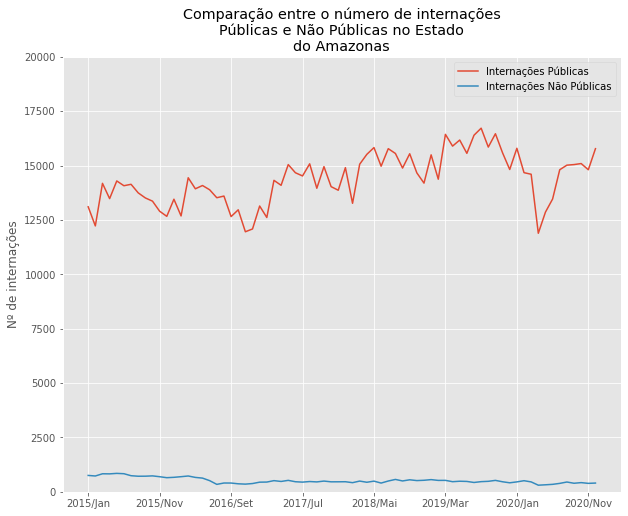

In [80]:
ax = internacoes_publicas.loc["13 Amazonas"].T.plot(figsize=(10,8), ylabel="Nº de internações")
internacoes_nao_pub.loc["13 Amazonas"].T.plot(figsize=(10,8), ax=ax)
plt.ylim(0,20000)
ax.legend(["Internações Públicas", "Internações Não Públicas"])
plt.title('Comparação entre o número de internações\nPúblicas e Não Públicas no Estado\ndo Amazonas')
plt.show()

#Comparação entre o número de internações Públicas e Não Públicas no Distrito Federal
No Distrito Federal, houveram mais internações Públicas do que Não Públicas.

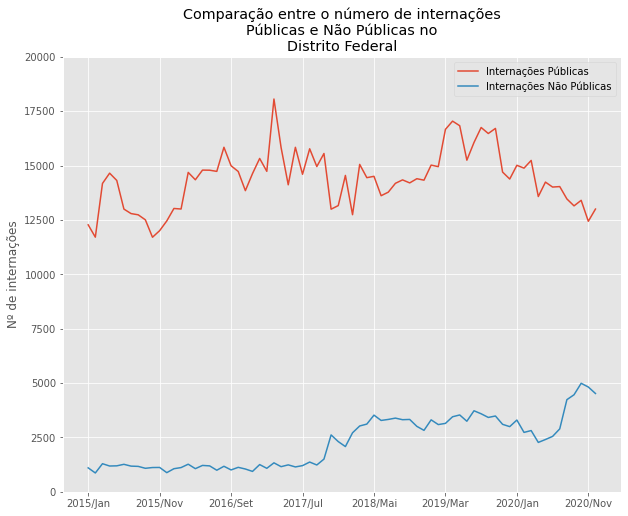

In [79]:
ax = internacoes_publicas.loc["53 Distrito Federal"].T.plot(figsize=(10,8), ylabel="Nº de internações")
internacoes_nao_pub.loc["53 Distrito Federal"].T.plot(figsize=(10,8), ax=ax)
plt.ylim(0,20000)
ax.legend(["Internações Públicas", "Internações Não Públicas"])
plt.title('Comparação entre o número de internações\nPúblicas e Não Públicas no\nDistrito Federal')
plt.show()

#O que concluir dessas análises?

Primeiramente, é importante entender que esta análise é somente inicial, e não gera nenhuma conclusão concreta sobre minhas hipóteses.

Com isto em mente, é possível observar que os estados de Minas Gerais e Amazonas se comportaram como previsto. Minas Gerais, com sua renda per capita elevada, apresentou mais internações Não Públicas, enquanto o Amazonas, com sua renda per capita menor, apresentou mais internações Públicas.

O Destrito Federal, porém, é o estado do Brasil com maior renda per capita, porém ele apresenta muito mais internações Públicas. Acredito que isse se dê por ser a capital do Brasil, tendo assim muitos servidores públicos, que utilizam o sistema público de saúde.

Já o Estado de São Paulo teve o comportamento mais diferente de todos, seu número de internações Públicas e Não Públicas foi bastante semelhante. Sendo o estado com a segunda maior renda per capita do país, seu elevado número de internações Não Públicas condiz com minha hipótese. Um fator peculiar, porém, que acredito ser o motivo de tantas internações Públicas: O Hospital das Clínicas (HC) fica em São Paulo. Este renomado hospital, de escopo público, atrai paciente do país inteiro, e até de outros países. 

#Segunda Análise
Gostaria de analisar, também, a comparação de custo, por internação, entre o escopo Público e Não Público.

In [113]:
#Fazendo os valores de gasto por internação
valor_publico_por_internacao = valor_publico / internacoes_publicas
valor_nao_pub__por_internacao = valor_nao_pub / internacoes_nao_pub

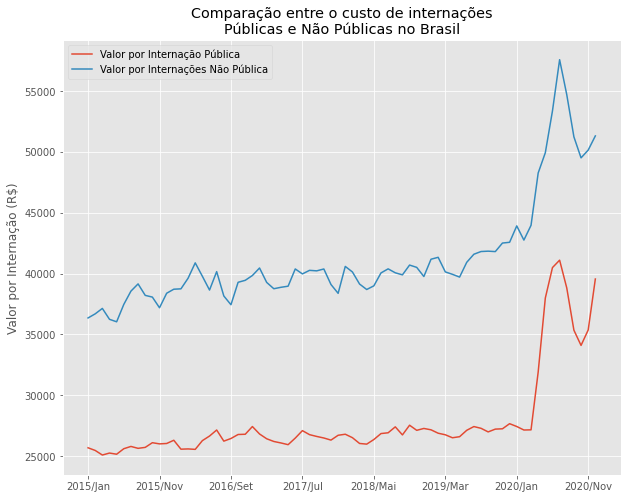

In [127]:
ax = valor_publico_por_internacao.sum().T.plot(figsize=(10,8), ylabel="Valor por Internação (R$)")
valor_nao_pub__por_internacao.sum().T.plot(ax=ax)
ax.legend(["Valor por Internação Pública", "Valor por Internações Não Pública"])
plt.title('Comparação entre o custo de internações\nPúblicas e Não Públicas no Brasil')
plt.show()

Observamos aqui que o custo médio de internações públicas no Brasil tende a ser menor do que em internações não públicas.